# Test Script

In [23]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd

In [24]:
import os
import numpy as np 
import cv2
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import tensorflow as tf

In [25]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2

In [26]:
X_test = np.load('data_train.npy').T
t_test = np.load('t_train_corrected.npy')
t_test_re = t_test

In [27]:
X_test = np.array([ cv2.resize(x.reshape(300,300),(300,100)).reshape(300*100) for x in X_test ])

In [28]:
t_test= np_utils.to_categorical(t_test)

In [29]:
X_test = X_test.reshape(9032, 300, 100)
t_test = t_test

In [30]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_test.shape
IMAGE_CHANNELS = 3

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 300
IMAGE_HEIGHT: 100
IMAGE_CHANNELS: 3


In [31]:
X_test = X_test.reshape(
    X_test.shape[0],
    100,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [32]:
X_test = X_test / 255

In [33]:
print( X_test.shape, t_test.shape)

(9032, 100, 100, 3) (9032, 10)


In [34]:
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
model_name = 'handwritten_math_recognition_cnn.h5'

In [36]:
loaded_model = tf.keras.models.load_model(model_name)

In [37]:
score= loaded_model.evaluate(X_test, t_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 1.48%


In [38]:
predictions_one_hot = loaded_model.predict([X_test])

283/283 [==============================] - 152s 513ms/step


In [39]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,0
1,4
2,2
3,6
4,3
...,...
9027,3
9028,0
9029,8
9030,4


In [42]:
import seaborn as sn

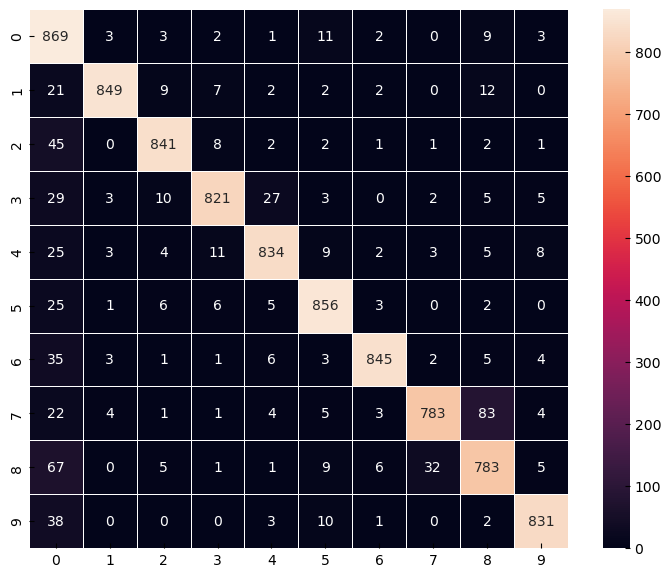

In [43]:
confusion_matrix = tf.math.confusion_matrix(t_test_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()